## Import some things we'll need and set some plot options

In [62]:
# fix for display issue
import xarray as xr
import numpy as np
import intake
xr.set_options(display_style='text')
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15.0, 15.0)

## Complex data sets quick and easily avalable to users, just install!

In [5]:
%pip install met_office_datasets --upgrade

Requirement already up-to-date: met_office_datasets in /anaconda/envs/py3.8/lib/python3.8/site-packages (0.0.17)
     |████████████████████████████████| 11.6 MB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 68.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 68.5 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 5.3 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


## Explore the datasets avaliable

In [17]:
list(intake.cat)

['met_office']

In [8]:
import intake
list(intake.cat)
# list(intake.cat.met_office.air_quality)

['met_office']

## Open one

In [21]:
aq_ds = intake.cat.met_office.air_quality.air_quality_hourly.read_chunked()
aq_ds

<xarray.Dataset>
Dimensions:                  (projection_x_coordinate: 548, projection_y_coordinate: 704, time: 7918)
Coordinates:
  * projection_x_coordinate  (projection_x_coordinate) float64 -2.38e+05 ... ...
  * projection_y_coordinate  (projection_y_coordinate) float64 -1.84e+05 ... ...
  * time                     (time) datetime64[ns] 2020-01-01 ... 2020-11-25T...
Data variables:
    no2                      (time, projection_y_coordinate, projection_x_coordinate) float32 dask.array<chunksize=(24, 704, 548), meta=np.ndarray>
    o3                       (time, projection_y_coordinate, projection_x_coordinate) float32 dask.array<chunksize=(24, 704, 548), meta=np.ndarray>
    pm10                     (time, projection_y_coordinate, projection_x_coordinate) float32 dask.array<chunksize=(24, 704, 548), meta=np.ndarray>
    pm2p5                    (time, projection_y_coordinate, projection_x_coordinate) float32 dask.array<chunksize=(24, 704, 548), meta=np.ndarray>
    so2                      (time, projection_y_coordinate, projection_x_coordinate) float32 dask.array<chunksize=(24, 704, 548), meta=np.ndarray>

In [41]:
list(aq_ds.data_vars)[0]

'no2'

In [54]:
print("For the whole air quality dataset above:")
print(f"\tNumber of points {np.product(aq_ds[list(aq_ds.data_vars)[0]].shape) * len(aq_ds.data_vars):,}")
print(f"\tApprox uncompressed data volumes = {len(aq_ds.data_vars)* np.product(aq_ds[list(aq_ds.data_vars)[0]].shape) * 32  / 10**9:.1f}GB")
print("")
print("For one parameter (e.g. Nitrus Oxide):")
print(f"\tNumber of points {np.product(aq_ds[list(aq_ds.data_vars)[0]].shape) :,}")
print(f"\tApprox uncompressed data volumes = {np.product(aq_ds[list(aq_ds.data_vars)[0]].shape) * 32  / 10**9:.1f}GB")

For the whole air quality dataset above:
	Number of points 15,273,505,280
	Approx uncompressed data volumes = 488.8GB

For one parameter (e.g. Nitrus Oxide):
	Number of points 3,054,701,056
	Approx uncompressed data volumes = 97.8GB


## What was the Nitrus Oxide levels like on 01/02/20 at lunchtime?

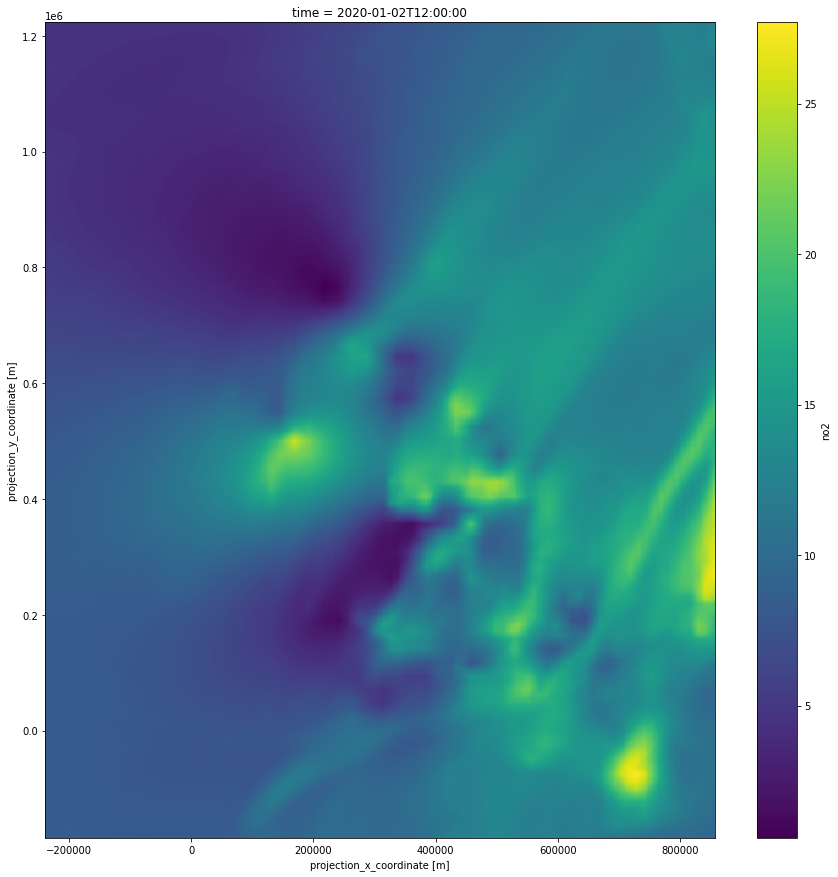

In [63]:
aq_ds.no2.sel(time="01/02/20T12:00").plot()

## What was the max NO levels in Feb?

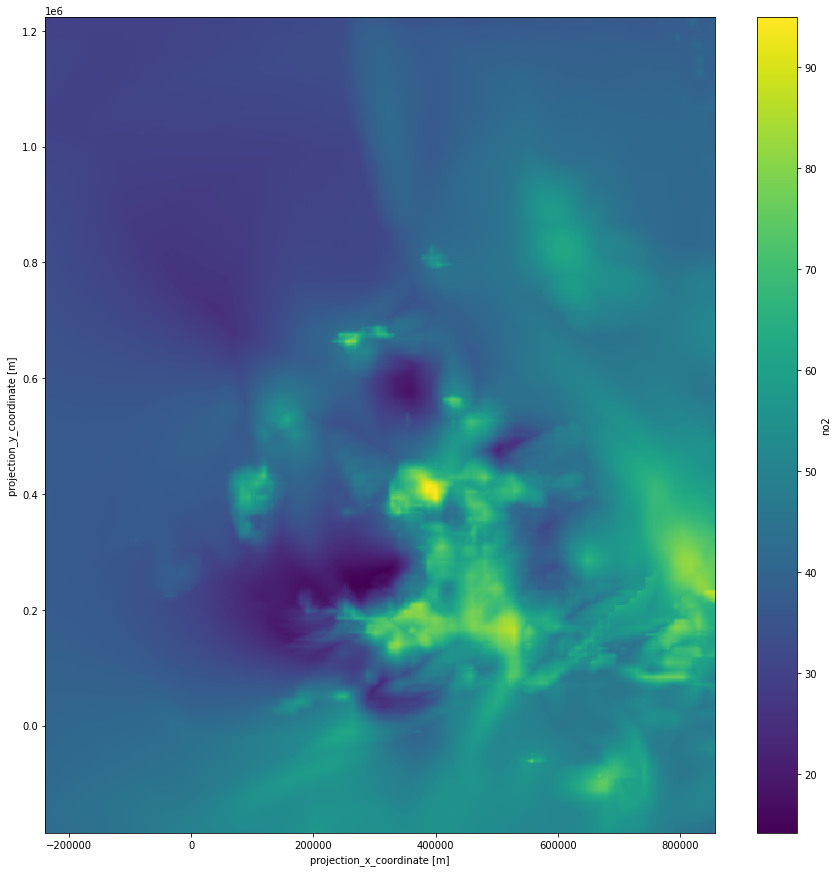

In [66]:
aq_ds.no2.sel(time=slice("01/02/20T00:00:00","28/02/20T23:59:59")).max(dim='time').plot()

## What was the mean NO levels across the UK in 2020?

/anaconda/envs/py3.8/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/anaconda/envs/py3.8/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


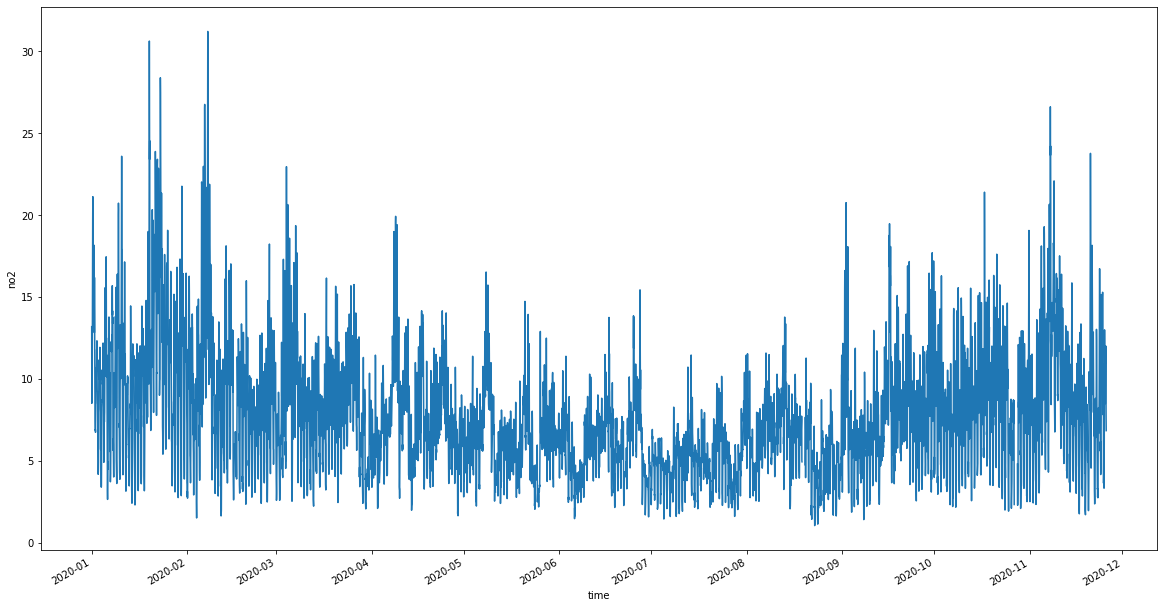

In [67]:
aq_ds.no2.mean(dim=['projection_x_coordinate','projection_y_coordinate']).plot(aspect=2, size=10)